In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
#what are the probable cause of warning?

from sklearn.preprocessing import LabelEncoder
#label, onehot, mappin numeric values for categorical values
#what is encoding?
#diff between label encoding and onehot encoding
#when do we use these encodings


from sklearn.preprocessing import StandardScaler
#what is standard scaling? Why do we use it?
#Other types of scaling techniques
from sklearn.model_selection import train_test_split
#Parameters of train_test_split func

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

 


In [126]:
path = "C:\\Users\\pilot\\Downloads\\archive (1)\\"
df = pd.read_csv(path + "mushrooms.csv")

In [127]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [129]:
df["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [130]:
map1 = list()

encoder = LabelEncoder()

for column in range(len(df.columns)) : 
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    map1_dict = {index: label for index, label in enumerate (encoder.classes_)}
    map1.append(map1_dict)

In [131]:
map1

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [132]:
Y = df["class"]
X = df.drop('class', axis=1)

In [133]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7)

In [135]:
log_model = LogisticRegression( )
svm_model = SVC( C = 1, kernel = 'rbf')

In [136]:
np.sum(Y)/len(Y)

0.48202855736090594

In [137]:
log_model.fit(X_train , Y_train)
svm_model.fit(X_train , Y_train)

SVC(C=1)

In [154]:
print(f"Logistic Regression: {log_model.score(X_test,Y_test)}")
print(f"Support Vector Machine : {svm_model.score(X_test,Y_test)}")
print(f"DecisionTreeClassifier : {dt.score(X_train,Y_train)}")


Logistic Regression: 0.9548810500410172
Support Vector Machine : 1.0
DecisionTreeClassifier : 0.9787196623285263


In [139]:
X_test.shape

(2438, 22)

<AxesSubplot:>

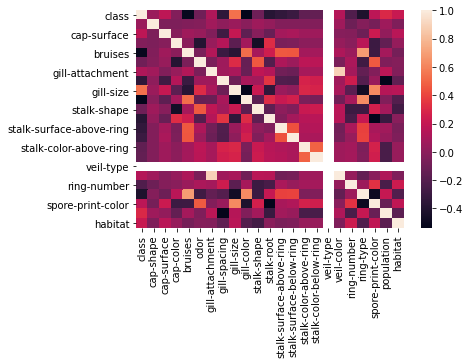

In [140]:
corr = df.corr()

sns.heatmap(corr)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [142]:
df.shape

(8124, 23)

In [163]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

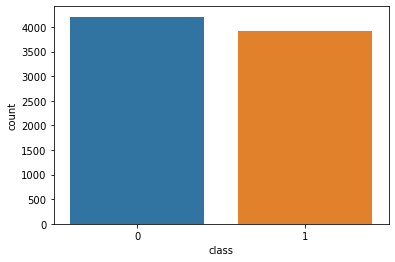

In [144]:
sns.countplot(df["class"])

<Figure size 1152x432 with 0 Axes>

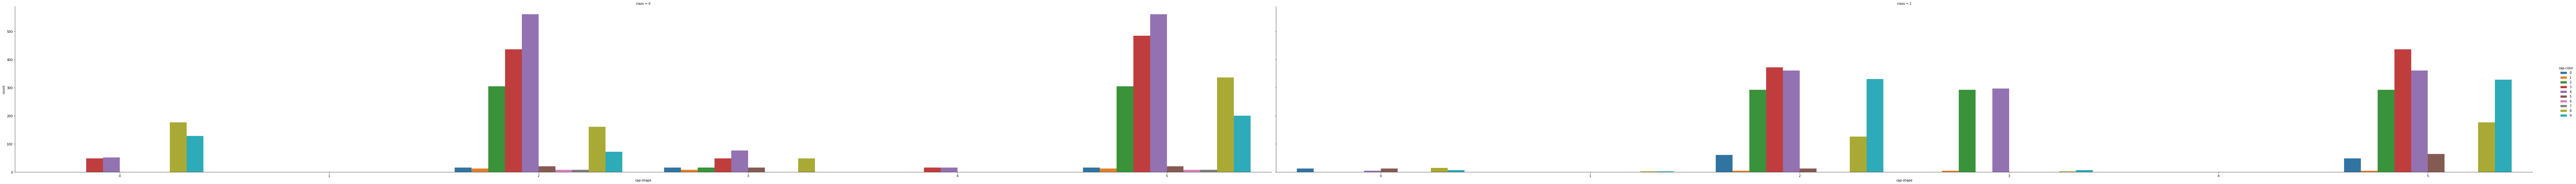

In [145]:
plt.figure(figsize = (16,6))
g = sns.catplot(x="cap-shape", hue="cap-color", col="class", 
               data=df, kind="count",
               height=8, aspect=7)


<Figure size 1008x432 with 0 Axes>

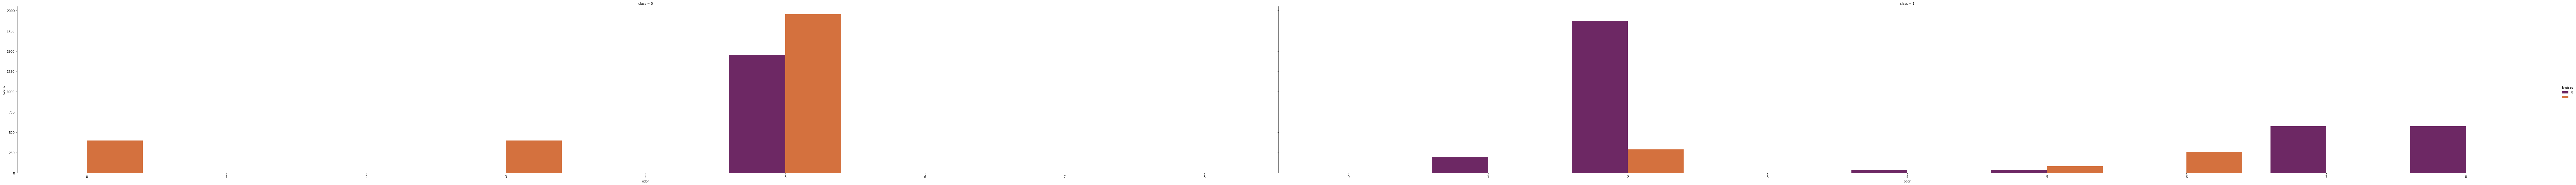

In [146]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class", 
               data=df, kind="count",
               height=8, aspect=7, palette="inferno")


In [147]:
dt = DecisionTreeClassifier(random_state=0, max_depth=5)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [148]:
dt.score(X_train,Y_train)

0.9787196623285263

In [155]:
predictions = dt.predict(X_test)

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.9807219031993437

In [159]:
rf = RandomForestClassifier(max_depth=5)

In [161]:
rf.fit(X_train, Y_train)
rf.score(X_train, Y_train)

0.990678860358776